### Data Analysis with Gateway Transaction Data

### Read Data

In [1]:
import csv

def parse_csv(datafile):
    data = []
    with open(datafile, "r") as sd:
        r = csv.DictReader(sd)
        for line in r:
            data.append(line)

    return data

gw_data = parse_csv('gateway.csv')

### QA. Success Rates

In [2]:
from collections import Counter

transaction_type = []
gateway = []

transaction_succ = []
gateway_succ = []

unique_transaction = set()

ga_data = {}
gb_data = {}
ga_data_succ = {}
gb_data_succ = {}

transaction_succ_rate = {}
gateway_succ_rate = {}
ga_succ_rate = {}
gb_succ_rate = {}

for i in gw_data:
    transaction_type.append(i['transaction_type'])
    gateway.append(i['gateway'])
    
    unique_transaction.add(i['transaction_type'])
    
    if i['status']=='succeeded':
        transaction_succ.append(i['transaction_type'])
        gateway_succ.append(i['gateway'])
        
# calculate the total number of each transaction type and gateway
transaction_count = Counter(transaction_type)
gateway_count = Counter(gateway)

# calculate the succeeded number of each transaction type and gateway
transaction_succ_count = Counter(transaction_succ)
gateway_succ_count = Counter(gateway_succ)

# calculate the total and succeeded number for each transaction type and each gateway
for i in unique_transaction:
    ga_data[i] = 0
    gb_data[i] = 0
    ga_data_succ[i] = 0
    gb_data_succ[i] = 0

for i in gw_data:
    if i['gateway'] == 'GA':
        ga_data[i['transaction_type']] += 1
        if i['status'] == 'succeeded':
            ga_data_succ[i['transaction_type']] += 1
            
    if i['gateway'] == 'GB':
        gb_data[i['transaction_type']] += 1
        if i['status'] == 'succeeded':
            gb_data_succ[i['transaction_type']] += 1

# calcualte success rate
for key in transaction_count.keys():
    transaction_succ_rate[key] = round(transaction_succ_count[key]/transaction_count[key],2)
    
for key in gateway_count.keys():
    gateway_succ_rate[key] = round(gateway_succ_count[key]/gateway_count[key],2)

for key in ga_data.keys():
    ga_succ_rate[key] = round(ga_data_succ[key]/ga_data[key],2)

for key in gb_data.keys():
    gb_succ_rate[key] = round(gb_data_succ[key]/gb_data[key],2)
    
print('Total Number for each transaction type:')
print(transaction_count)
print('Total Succeeded Number for each transaction type:')
print(transaction_succ_count)
print('\n')

print('Total Number for each gateway:')
print(gateway_count)
print('Total Succeeded Number for each gateway:')
print(gateway_succ_count)
print('\n')

print('Total Number for each transaction type of GA:')
print(ga_data)
print('Total Succeeded Number for each transaction type of GA:')
print(ga_data_succ)
print('\n')

print('Total Number for each transaction type of GB:')
print(gb_data)
print('Total Succeeded Number for each transaction type of GB:')
print(gb_data_succ)
print('\n')

Total Number for each transaction type:
Counter({'Purchase': 3430, 'Authorization': 1400, 'Credit': 170})
Total Succeeded Number for each transaction type:
Counter({'Purchase': 1421, 'Authorization': 470, 'Credit': 75})


Total Number for each gateway:
Counter({'GB': 4308, 'GA': 692})
Total Succeeded Number for each gateway:
Counter({'GB': 1595, 'GA': 371})


Total Number for each transaction type of GA:
{'Credit': 14, 'Authorization': 151, 'Purchase': 527}
Total Succeeded Number for each transaction type of GA:
{'Credit': 9, 'Authorization': 19, 'Purchase': 343}


Total Number for each transaction type of GB:
{'Credit': 156, 'Authorization': 1249, 'Purchase': 2903}
Total Succeeded Number for each transaction type of GB:
{'Credit': 66, 'Authorization': 451, 'Purchase': 1078}




### QA Answer

In [3]:
print('Success Rate for each transaction type:')
print(transaction_succ_rate)
print('\n')

print('Success Rate for each gateway:')
print(gateway_succ_rate)
print('\n')

print('Success Rate for each transaction type of GA:')
print(ga_succ_rate)
print('\n')

print('Success Rate for transaction type of GB:')
print(gb_succ_rate)
print('\n')

Success Rate for each transaction type:
{'Credit': 0.44, 'Authorization': 0.34, 'Purchase': 0.41}


Success Rate for each gateway:
{'GB': 0.37, 'GA': 0.54}


Success Rate for each transaction type of GA:
{'Credit': 0.64, 'Authorization': 0.13, 'Purchase': 0.65}


Success Rate for transaction type of GB:
{'Credit': 0.42, 'Authorization': 0.36, 'Purchase': 0.37}




### QB. What is the monthly success rate for purchases? 

In [4]:
import time

purchase_ga = []
purchase_gb = []
purchase_succ_ga = []
purchase_succ_gb = []
for i in gw_data:
    # extract month from epoch_date
    i['month'] = time.strftime("%m", time.gmtime(float(i['epoch_date'])))
    if i['transaction_type'] == 'Purchase' and i['gateway'] == 'GA':
        purchase_ga.append(i['month'])
        if i['status'] == 'succeeded':
            purchase_succ_ga.append(i['month'])
    if i['transaction_type'] == 'Purchase' and i['gateway'] == 'GB':
        purchase_gb.append(i['month'])
        if i['status'] == 'succeeded':
            purchase_succ_gb.append(i['month'])

# calculate monthly GA,GB total purchase
purchase_count_ga = Counter(purchase_ga)
purchase_count_gb = Counter(purchase_gb)

# calculate monthly GA,GB succeeded purchase
purchase_succ_count_ga = Counter(purchase_succ_ga)
purchase_succ_count_gb = Counter(purchase_succ_gb)

purchase_succ_rate_ga = {}
purchase_succ_rate_gb = {}

for key in purchase_count_ga.keys():
    purchase_succ_rate_ga[key] = round(purchase_succ_count_ga[key]/purchase_count_ga[key],2)

for key in purchase_count_gb.keys():
    purchase_succ_rate_gb[key] = round(purchase_succ_count_gb[key]/purchase_count_gb[key],2) 

print('Monthly Total Purchase for GA (\'month\',purchase):')
print(sorted(purchase_count_ga.items()))
print('Monthly Succeeded Purchase for GA (\'month\',purchase):')
print(sorted(purchase_succ_count_ga.items()))
print('\n')

print('Monthly Total Purchase for GB (\'month\',purchase):')
print(sorted(purchase_count_gb.items()))
print('Monthly Succeeded Purchase for GB (\'month\',purchase):')
print(sorted(purchase_succ_count_gb.items()))


Monthly Total Purchase for GA ('month',purchase):
[('01', 19), ('02', 20), ('03', 36), ('04', 20), ('05', 44), ('06', 34), ('07', 21), ('08', 31), ('09', 23), ('10', 71), ('11', 192), ('12', 16)]
Monthly Succeeded Purchase for GA ('month',purchase):
[('01', 8), ('02', 16), ('03', 28), ('04', 15), ('05', 29), ('06', 30), ('07', 11), ('08', 25), ('09', 17), ('10', 41), ('11', 111), ('12', 12)]


Monthly Total Purchase for GB ('month',purchase):
[('01', 96), ('02', 97), ('03', 165), ('04', 247), ('05', 302), ('06', 447), ('07', 326), ('08', 256), ('09', 335), ('10', 370), ('11', 193), ('12', 69)]
Monthly Succeeded Purchase for GB ('month',purchase):
[('01', 41), ('02', 41), ('03', 52), ('04', 81), ('05', 86), ('06', 107), ('07', 116), ('08', 119), ('09', 153), ('10', 178), ('11', 64), ('12', 40)]


### QB Answer

Monthly Success Rate for GA ('month',rate):
[('01', 0.42), ('02', 0.8), ('03', 0.78), ('04', 0.75), ('05', 0.66), ('06', 0.88), ('07', 0.52), ('08', 0.81), ('09', 0.74), ('10', 0.58), ('11', 0.58), ('12', 0.75)]


Monthly Success Rate for GB ('month',rate):
[('01', 0.43), ('02', 0.42), ('03', 0.32), ('04', 0.33), ('05', 0.28), ('06', 0.24), ('07', 0.36), ('08', 0.46), ('09', 0.46), ('10', 0.48), ('11', 0.33), ('12', 0.58)]




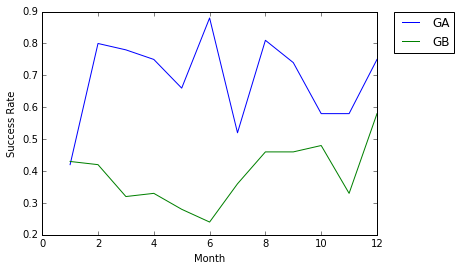

In [5]:
print('Monthly Success Rate for GA (\'month\',rate):')
print(sorted(purchase_succ_rate_ga.items()))
print('\n')

print('Monthly Success Rate for GB (\'month\',rate):')
print(sorted(purchase_succ_rate_gb.items()))
print('\n')

import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

plt.plot(*zip(*sorted(purchase_succ_rate_ga.items())),label='GA')
plt.plot(*zip(*sorted(purchase_succ_rate_gb.items())),label='GB')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                           